# Comparing Euphonic and an Updated OClimax

In [26]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

This notebook follows on from the previous notebook, `validate_oclimax_old`.

From a review of that notebook and discussions with the OClimax developer, it has been determined that the discrepancies exist for 2 main reasons:

* **Use of bin sizes that do not divide into 1**. OClimax will use equivalent q-points from other Brillouin zones to fill in q-bins, if a bin size is used that doesn't divide exactly into 1 there may be other q-points in other zones that fall within the bin, causing 2 or more q-points to contribute for OClimax, whereas for Euphonic only the exactly intended q-point will contribute. e.g. For the 30L_qe cut if a bin size of 0.075 is used, for q-point [-3., 0., 0.] the q-point [-3., 0., 0.] will contribute, but so will equivalent q-points [-3., 0., 0.975] and [-3., 0., 2.025] which also fall within the bin.
* **Numerical binning issues**. For example, when using a bin size of 0.025, Euphonic treats this as 0.025, whereas OClimax treated this as 0.0249999999. This results in adjacent q-points being included in the bin.

The cuts used previously have been updated to use a bin size that divides into 1, and OClimax has been updated to fix the numerical binning differences. Now that these issues have been fixed, the analysis will be repeated with the updated cuts and updated version of OClimax.

### By eye comparison

By just looking at the S(Q,w) plots for both OClimax (left) and Euphonic (left) you can tell the comparison is now much better. This will be quantified in the numerical comparisons to follow.

Quartz 2ph_m4_0


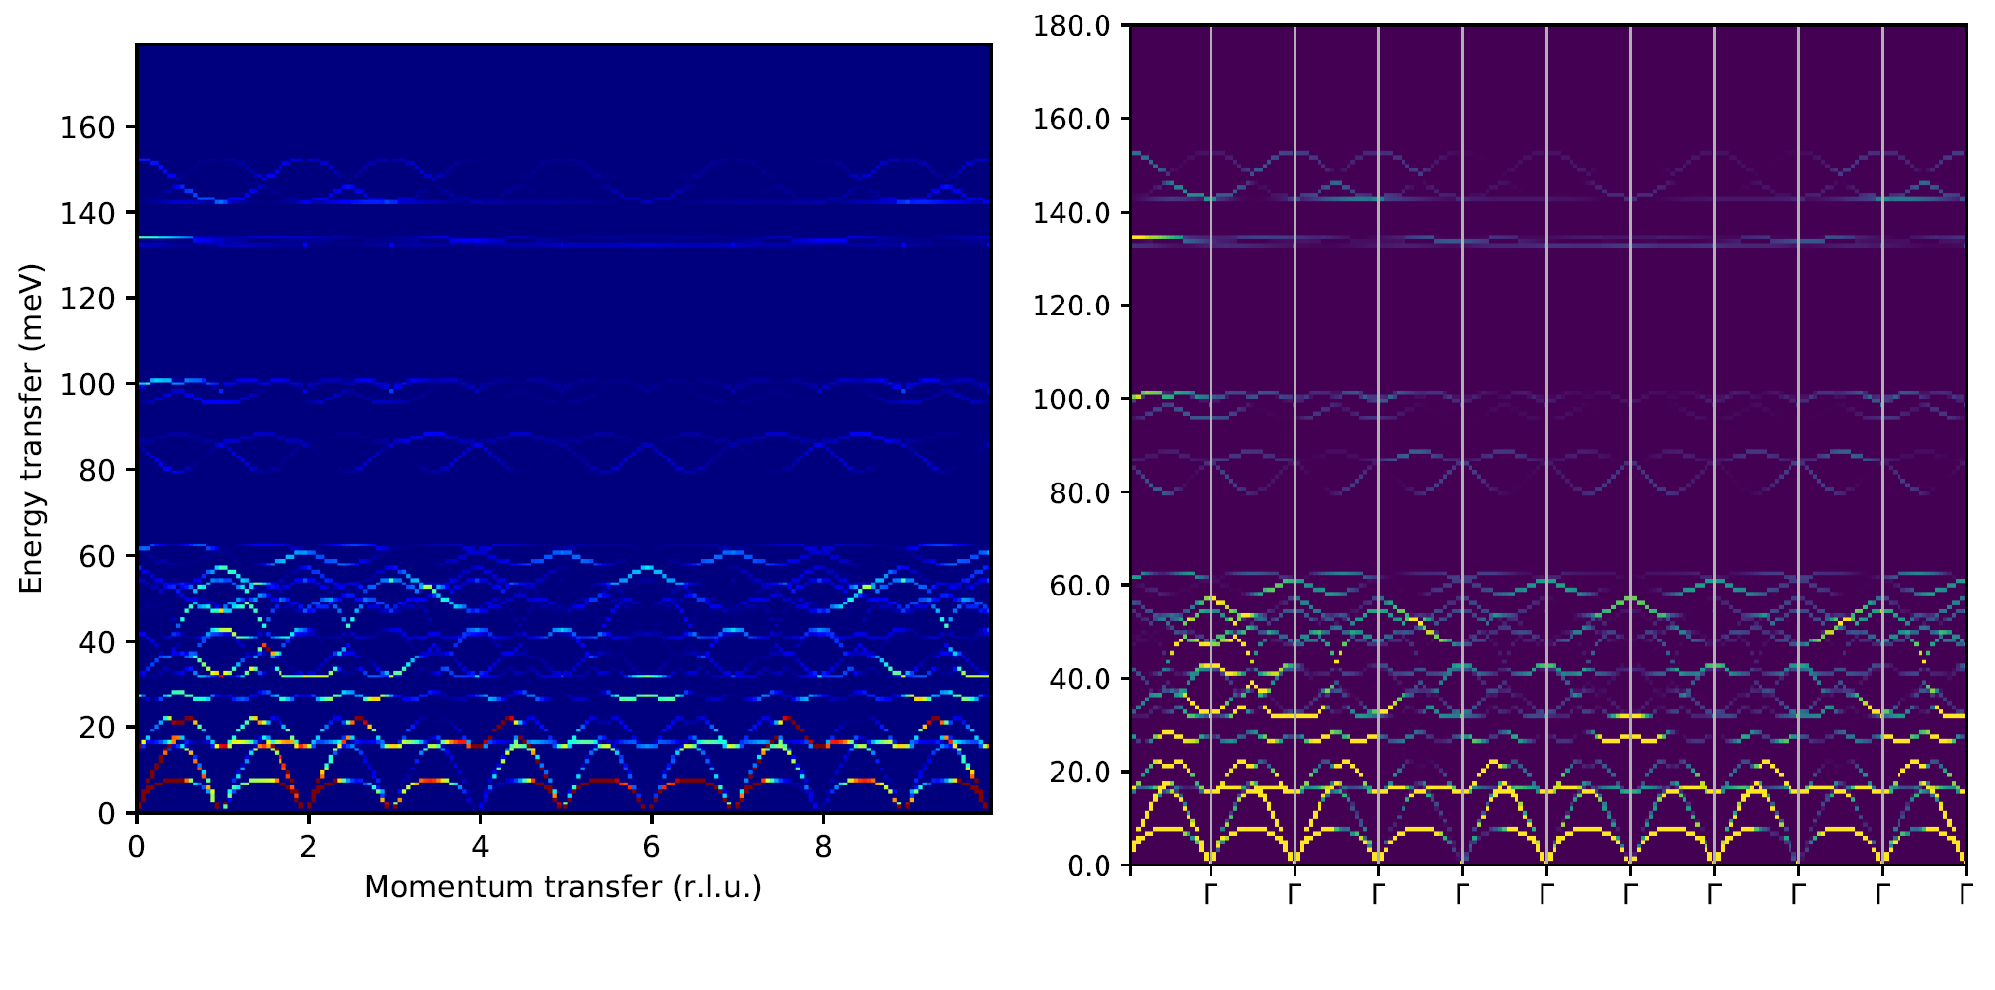

In [27]:
from IPython.display import Image
print('Quartz 2ph_m4_0')
Image(filename='images/quartz_2ph_m4_0.png')

Quartz 30L with 0.025 size bins


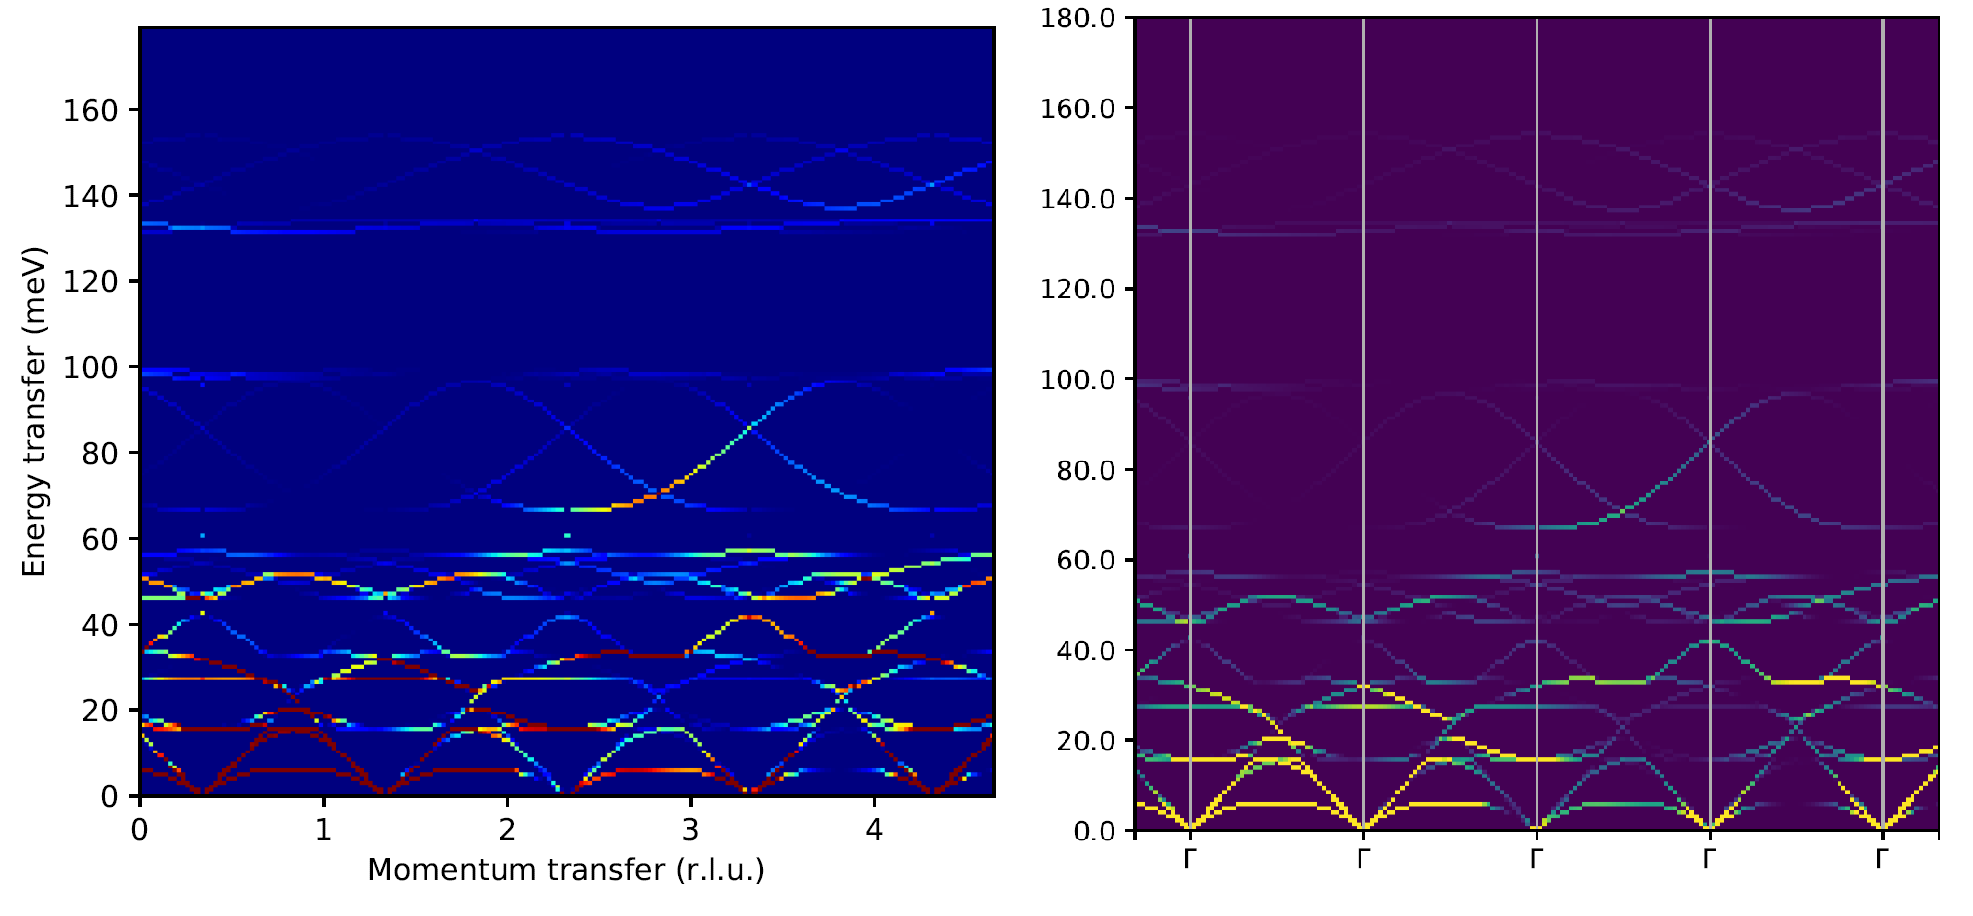

In [28]:
print('Quartz 30L with 0.025 size bins')
Image(filename='images/quartz_30L_fine.png')

LZO kagome


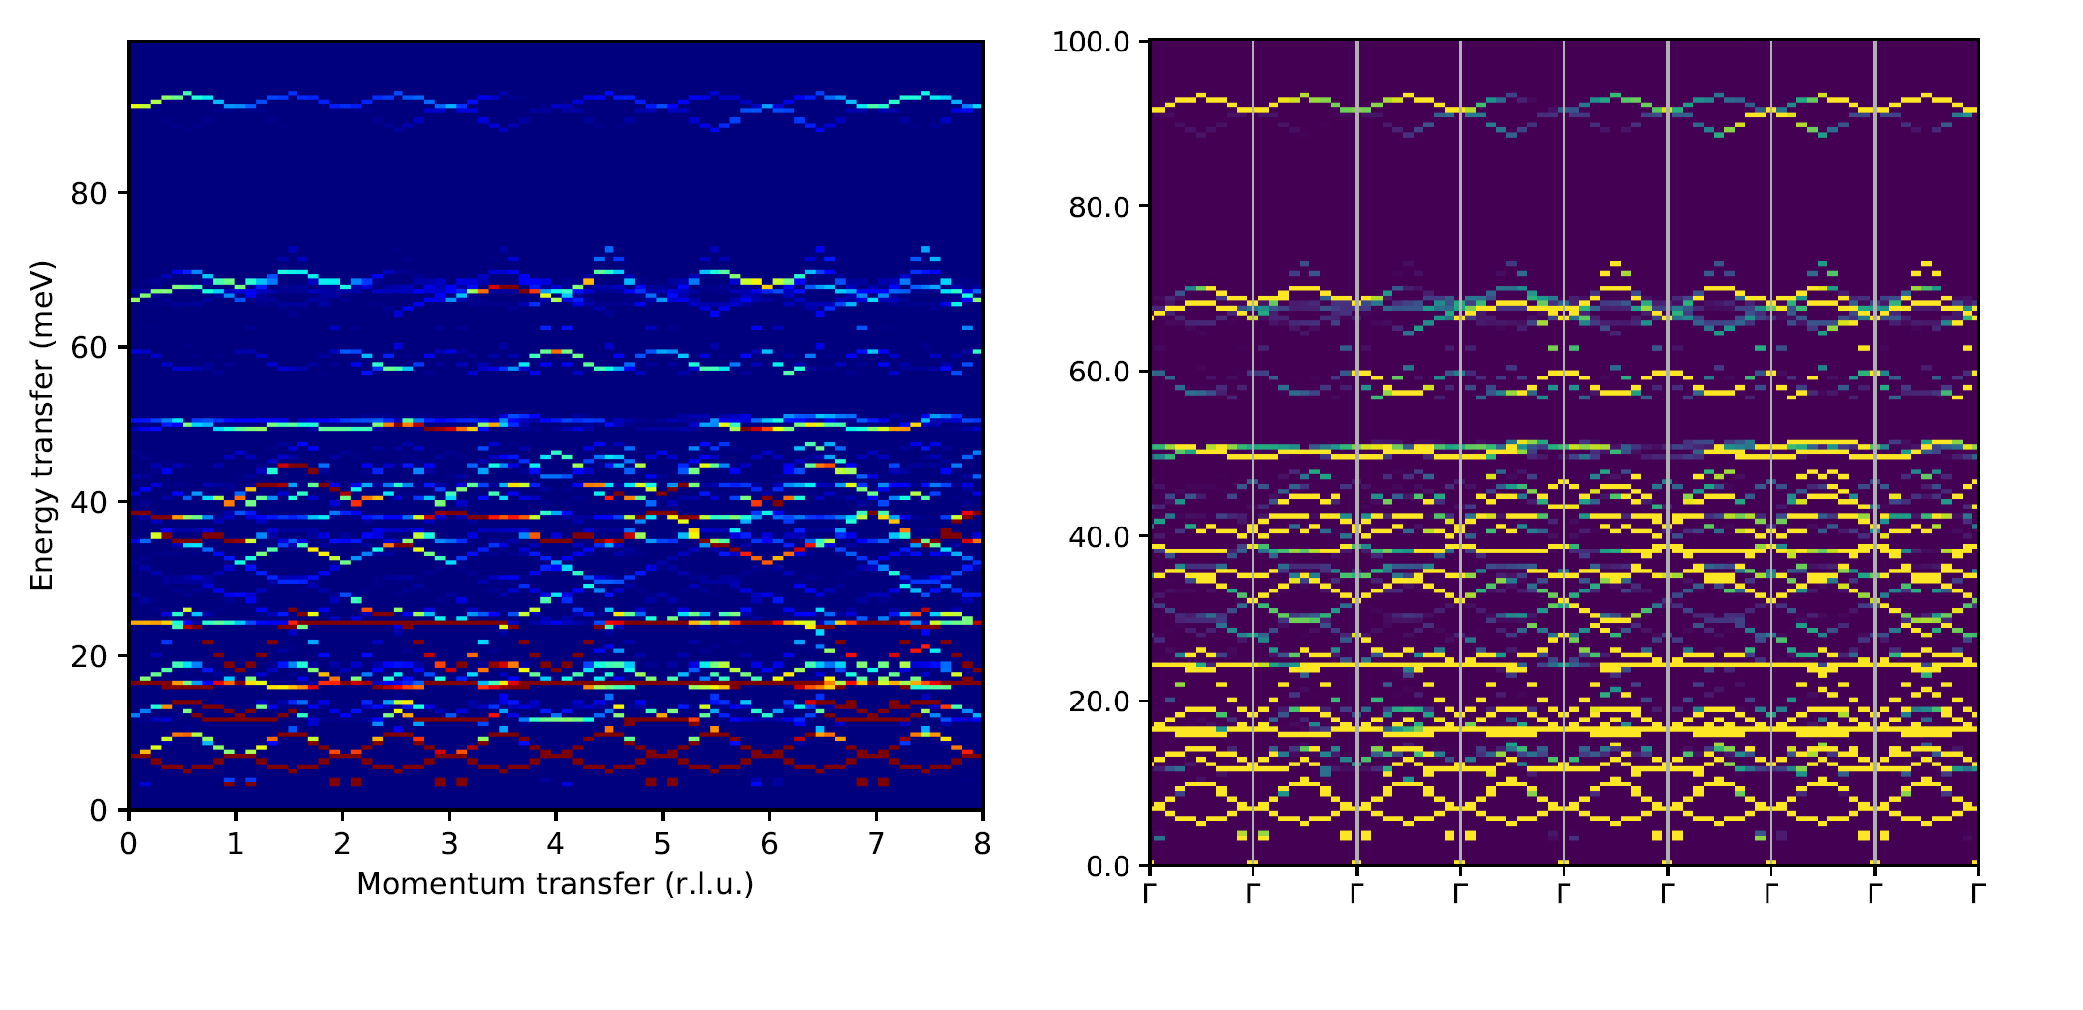

In [29]:
print('LZO kagome')
Image(filename='images/lzo_kagome.png')

LZO hh2 with 0.025 size bins


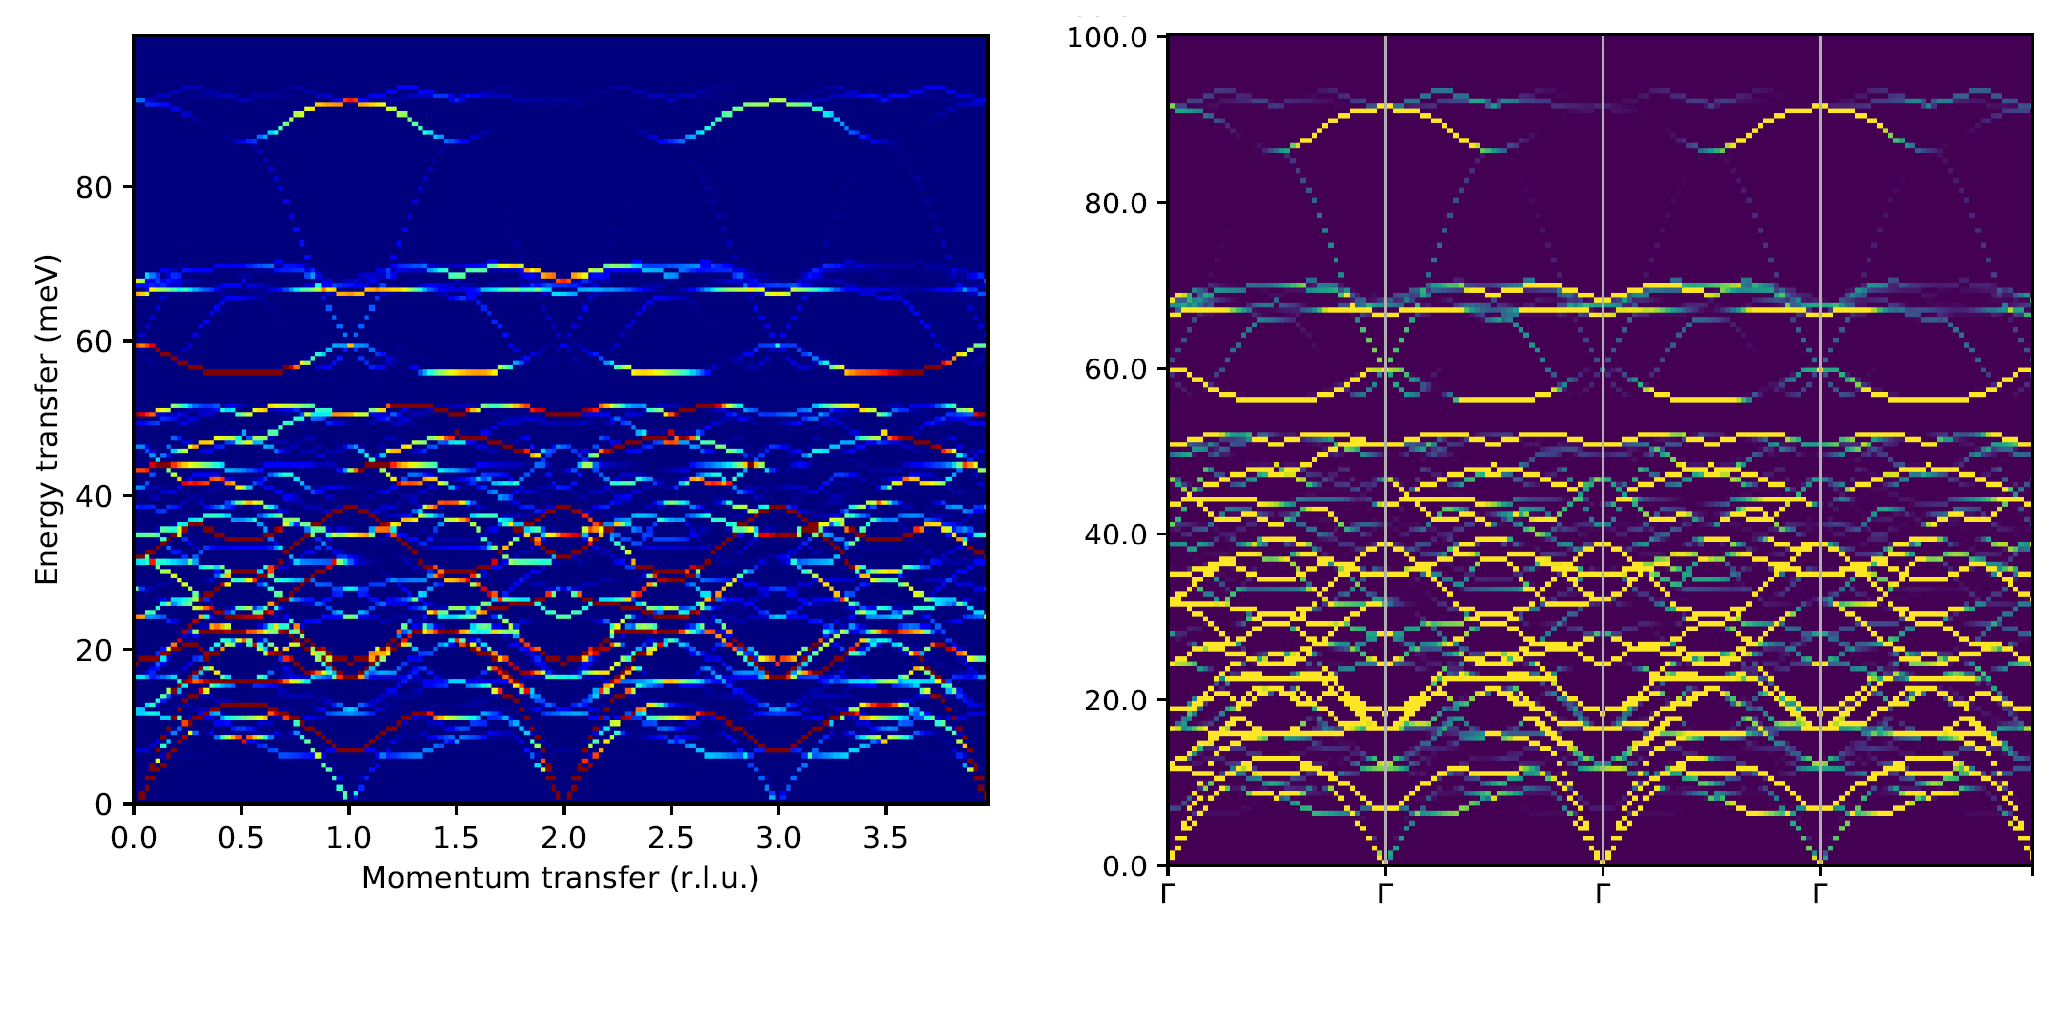

In [30]:
print('LZO hh2 with 0.025 size bins')
Image(filename='images/lzo_hh2_fine.png')

Nb m110


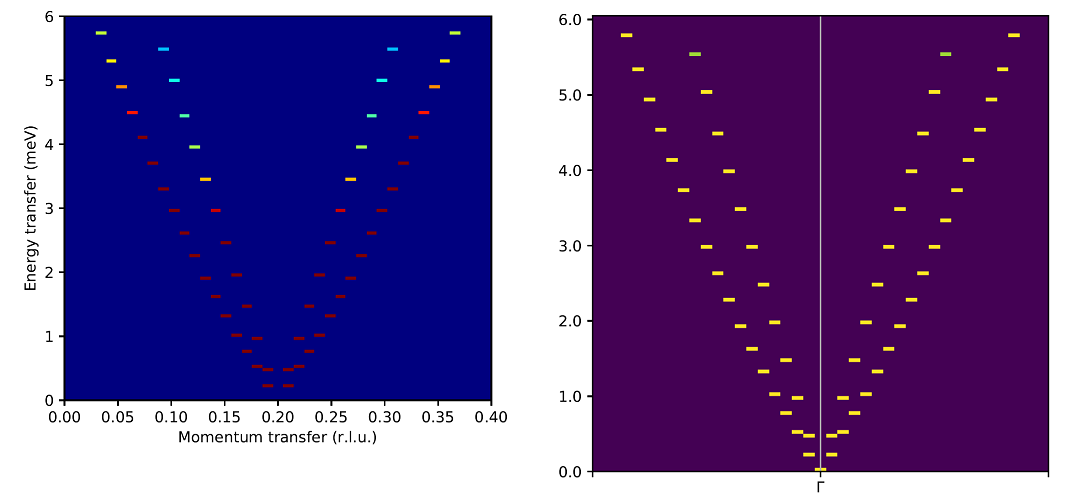

In [31]:
print('Nb m110')
Image(filename='images/nb_m110.png')

Nb 110


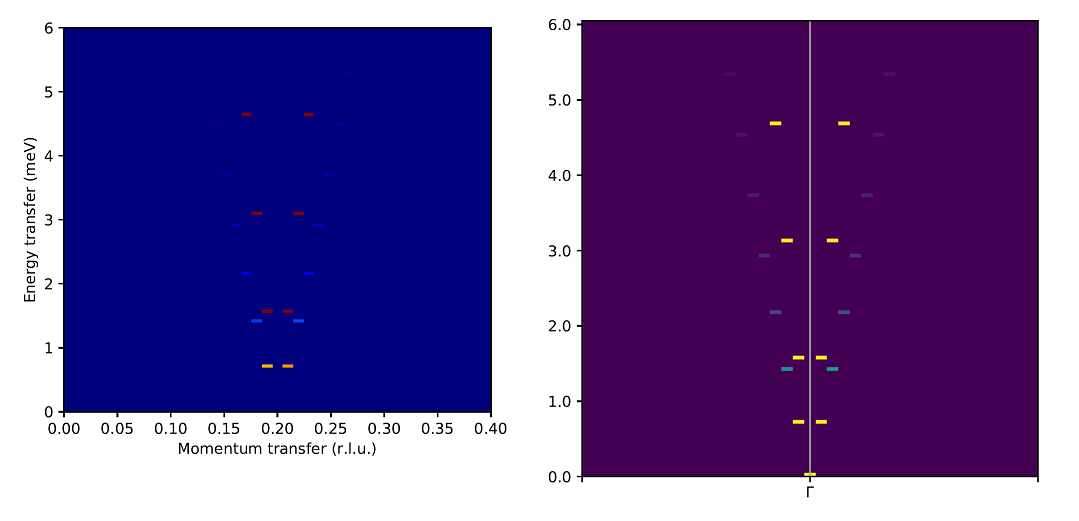

In [32]:
print('Nb 110')
Image(filename='images/nb_110.png')

### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the OClimax S(Q,w) with Euphonic's S(Q,w) that has been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [33]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

temp = '300'
quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])

nb_cuts = ['m110_qe', '110_qe']
for cut in nb_cuts:
    compare_sqw_main(['--sqw1', '../../nb/' + cut + '/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                      '--sqw2', '../../nb/' + cut + '/oclimax/nb_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_300K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 4.191268309358541e-12 max: 2.1714536594819084e-09 min: 9.019511260075515e-20
Relative Error - mean: 0.011207321495302843 max: 0.5061874634464457 min: 5.813984152018183e-07

Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_300K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.2693248040088944e-11 max: 2.3681405786423424e-09 min: 8.952943748349095e-19
Relative Error - mean: 0.02497295191838175 max: 3.188796680536908 min: 2.0920948432414263e-06

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.8487480712778398e-11 max: 1.372916226447874e-09 min: 9.335229539835445e-17
Relative Error - mean: 0.0438783957424043 max: 2.145123023884324 min: 5.312467115814944e-06

Results for ../../lzo/hh2_

Previously, the smallest mean relative error for all the cuts was 30%, now it has been reduced to just 1.1% and 2.5% for the Quartz cuts, and 4.4% and 5.4% for the LZO cuts, so clearly the corrections described above have improved the comparison. The mean relative errors for the Nb cuts are also just 3e-4% and 2e-3%.

Generally, the errors for LZO (and Quartz) are still slightly high, could this be due to temperature effects?

In [34]:
temp = '5'
quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])



Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.399108686365812e-12 max: 1.6290291944418023e-10 min: 1.2336624910733352e-27
Relative Error - mean: 0.006348106933758889 max: 0.11020315794166931 min: 6.955909516938595e-07

Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.0550839231894856e-12 max: 1.1852334198424386e-10 min: 3.38444791237223e-30
Relative Error - mean: 0.010106783117082832 max: 0.5316803649685065 min: 1.893271094228301e-06

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_5K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.04459597133562e-11 max: 7.289065046417747e-10 min: 2.3567791916028885e-31
Relative Error - mean: 0.02435186580248875 max: 1.0126283485005672 min: 3.334693474867488e-06

Results for ../../lzo/hh2_qe_fine/o

This has reduced the errors for the Quartz cuts to 0.6% and 1.0%, and the LZO cuts to 2.4% and 2.8%, so the temperature does make a difference - there may be some slight differences in the Bose factor and Debye-Waller factor. But even with almost no temperature effects the errors are still  2.3% and 2.7%. Lets look at the `hh2_qe_fine` cut and look at the q-points with the largest errors:


Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 5.8928674637673415e-12 max: 4.1891277922099535e-10 min: 8.778770982259163e-30
Relative Error - mean: 0.028206606825914308 max: 7.356348213190135 min: 1.8299184956626084e-06


<IPython.core.display.Javascript object>


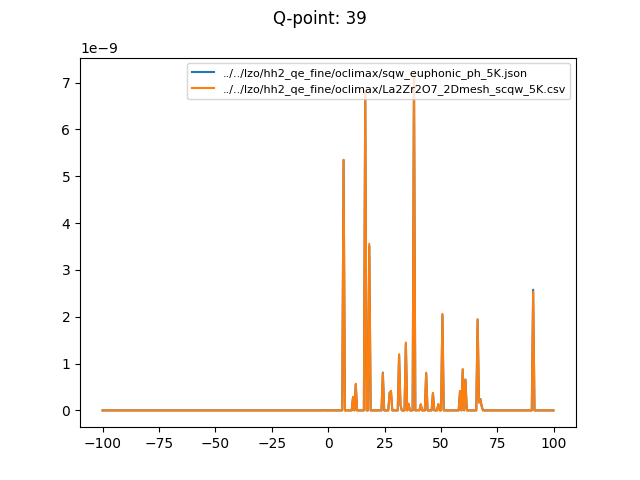

<IPython.core.display.Javascript object>


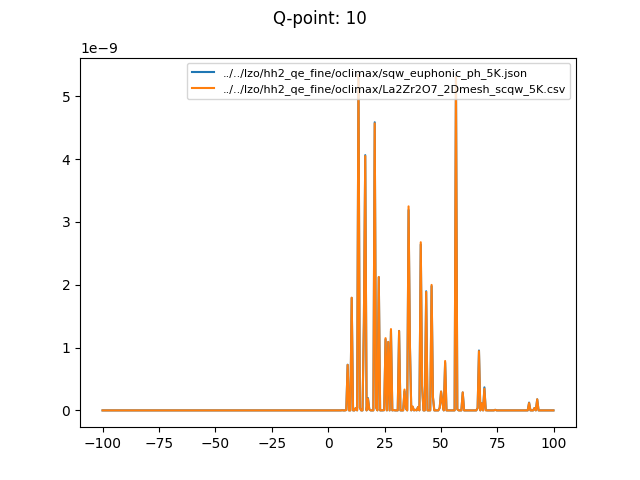

Points with largest mean relative error: (array([ 39,  10,  41,   0, 121]), array([169, 283, 169, 233, 169]))


In [35]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv', '-n', '5', '--qpts', '39,10', '--mask-bragg'])

Lets do the same with the `kagome_qe` cut:


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_5K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.04459597133562e-11 max: 7.289065046417747e-10 min: 2.3567791916028885e-31
Relative Error - mean: 0.02435186580248875 max: 1.0126283485005672 min: 3.334693474867488e-06


<IPython.core.display.Javascript object>


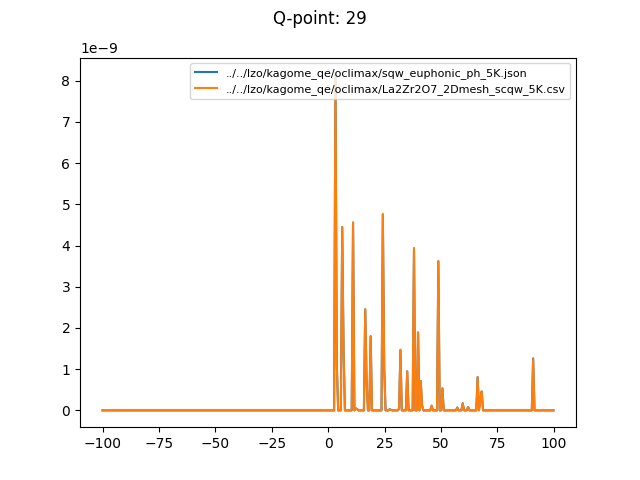

<IPython.core.display.Javascript object>


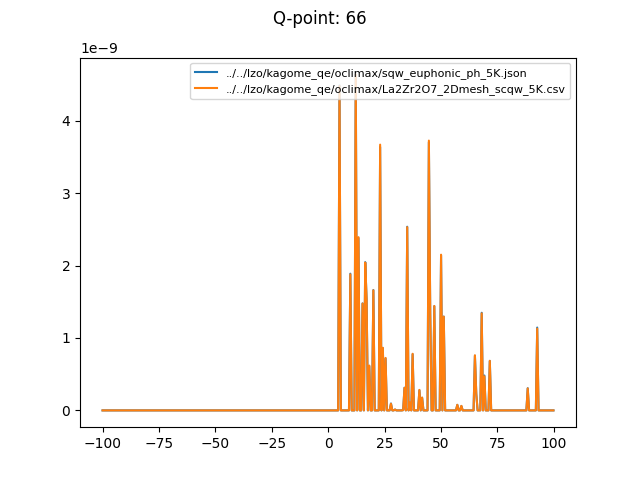

Points with largest mean relative error: (array([29, 66, 15, 65, 41]), array([278, 279, 213, 278, 172]))


In [36]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv', '-n', '5', '--qpts', '29,66', '--mask-bragg'])

Even at the q-points with the largest mean relative error, the agreement is actually very good and perhaps just an artefact of differently ordered floating point calculations.

To be sure, lets look at those same q-points at a higher temperature (300K):


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.8487480712778398e-11 max: 1.372916226447874e-09 min: 9.335229539835445e-17
Relative Error - mean: 0.0438783957424043 max: 2.145123023884324 min: 5.312467115814944e-06


<IPython.core.display.Javascript object>


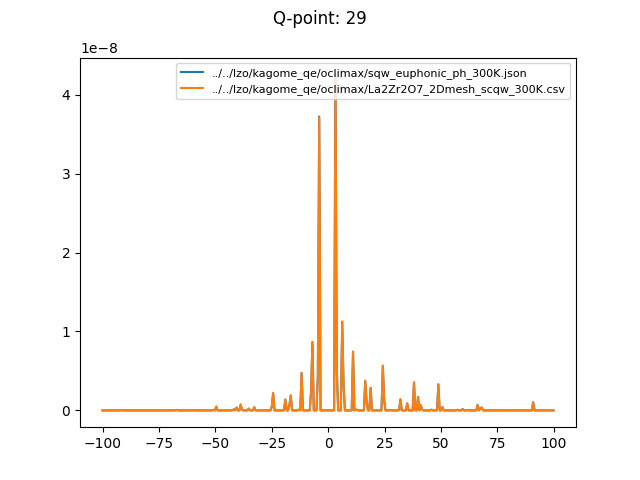

<IPython.core.display.Javascript object>


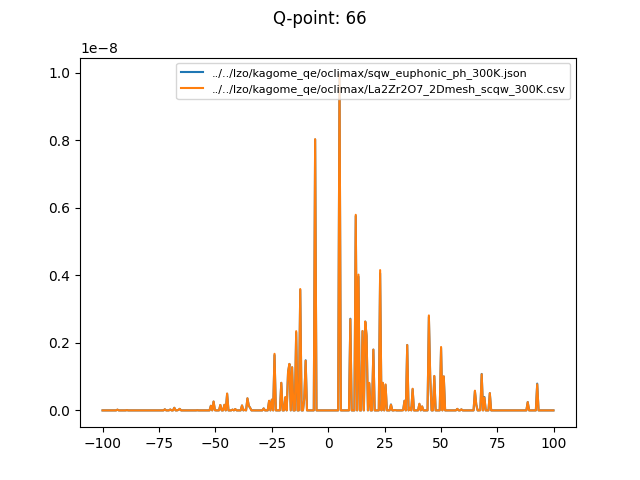

Points with largest mean relative error: (array([ 6, 14, 14, 22,  6]), array([241, 213, 119, 218,  54]))


In [37]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv', '-n', '5', '--qpts', '29,66', '--mask-bragg'])

There appears to be some discrepancies in the peaks of some modes, however if we look at the comparison between the structure factor calculations for Euphonic for frequencies read from a .phonon file and Euphonic-interpolated frequencies, there are similar differences:


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json ../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json
Absolute Error - mean: 1.9764159563910096e-11 max: 1.9315854579145317e-09 min: 2.0966383002829687e-17
Relative Error - mean: 0.020221055008134436 max: 3.5975995497205893 min: 1.2810294451220696e-05


<IPython.core.display.Javascript object>


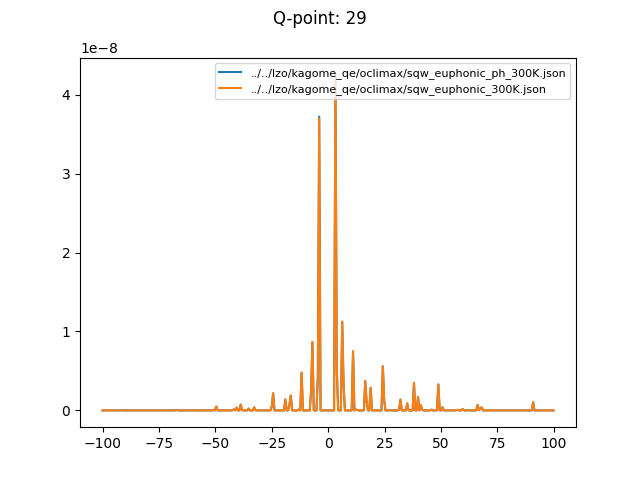

<IPython.core.display.Javascript object>


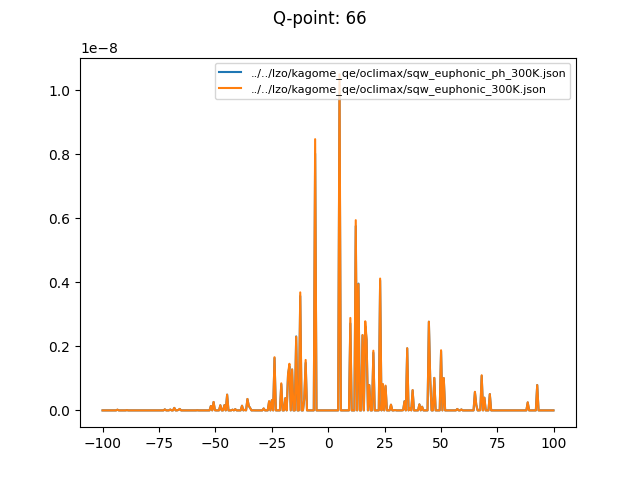

<IPython.core.display.Javascript object>


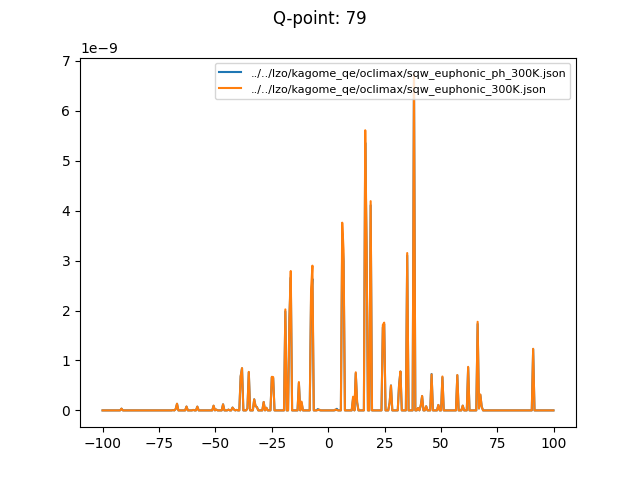

Points with largest mean relative error: (array([79, 79, 61, 61, 39]), array([159, 173, 160, 172, 172]))


In [38]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json', '-n', '5', '--qpts', '29,66,79', '--mask-bragg'])

This difference arises even though exactly the same formulation for the structure factor is being used, this shows just how sensitive the final structure factor is. This is acceptable, and is not enough of to make any meaningful difference in application of the software.

Again, as a sanity check lets check some random q-points for both Quartz and Nb:


Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_300K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.2693248040088944e-11 max: 2.3681405786423424e-09 min: 8.952943748349095e-19
Relative Error - mean: 0.02497295191838175 max: 3.188796680536908 min: 2.0920948432414263e-06


<IPython.core.display.Javascript object>


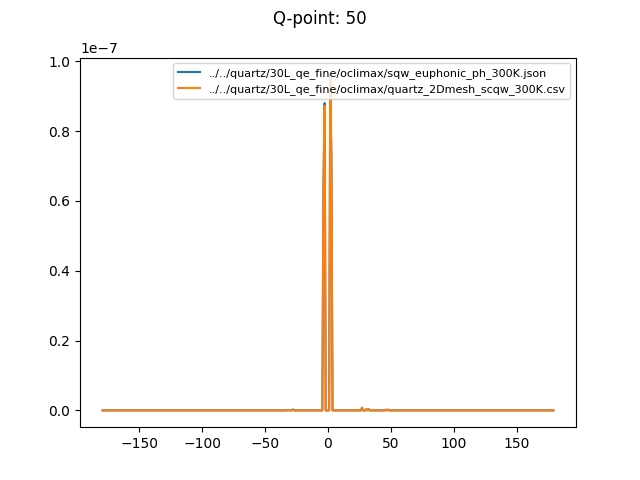

<IPython.core.display.Javascript object>


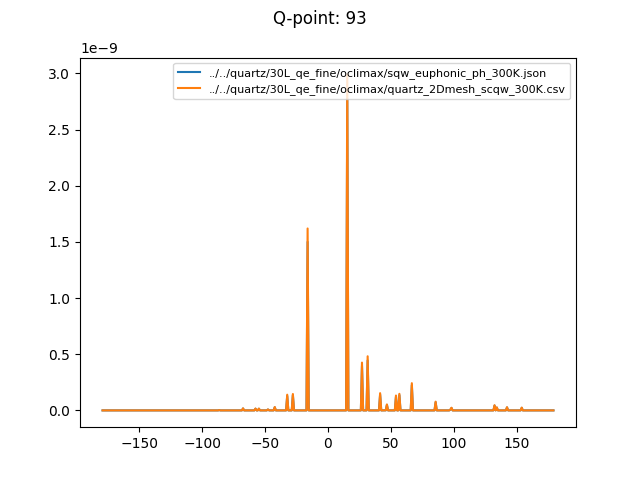


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_300K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 4.191268309358541e-12 max: 2.1714536594819084e-09 min: 9.019511260075515e-20
Relative Error - mean: 0.011207321495302843 max: 0.5061874634464457 min: 5.813984152018183e-07


<IPython.core.display.Javascript object>


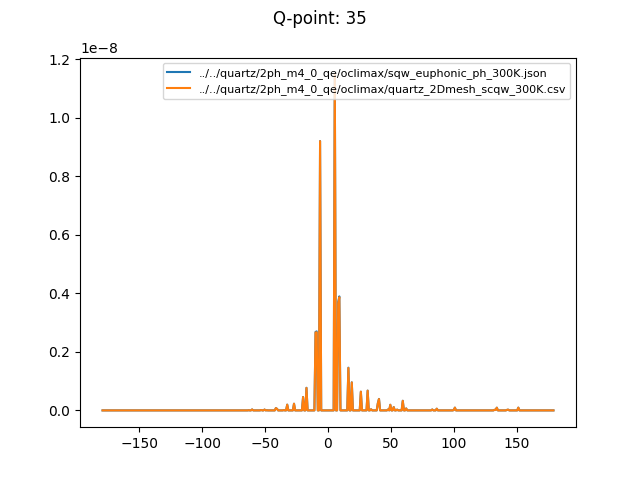

<IPython.core.display.Javascript object>


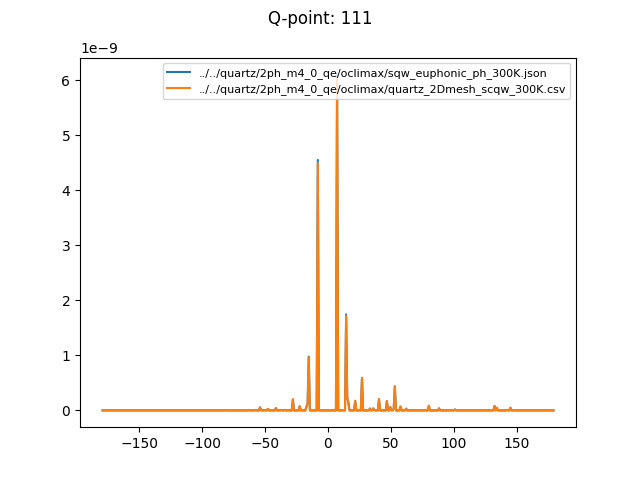


Results for ../../nb/m110_qe/oclimax/sqw_euphonic_ph_300K.json ../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.7725480894978995e-14 max: 2.9344774608014096e-13 min: 8.90169139885105e-20
Relative Error - mean: 2.413343304206371e-06 max: 7.3949683359900125e-06 min: 2.120422786671137e-08


<IPython.core.display.Javascript object>


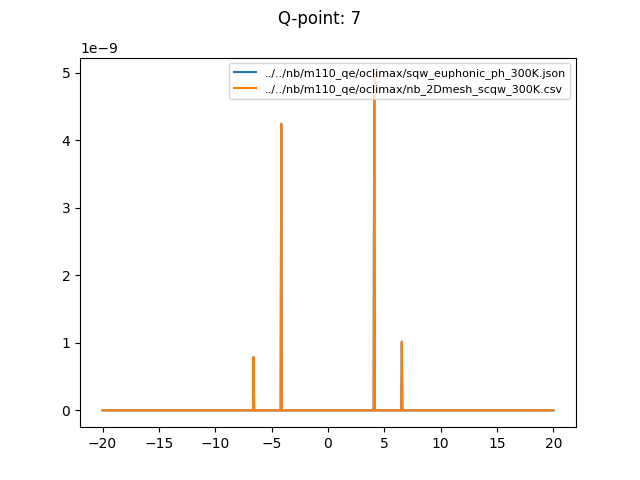

<IPython.core.display.Javascript object>


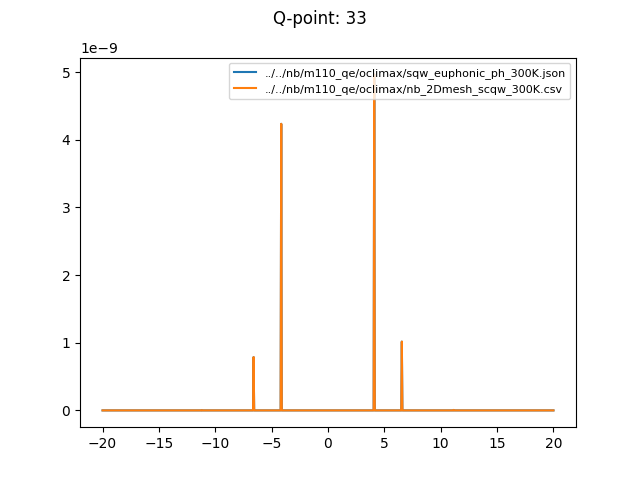


Results for ../../nb/110_qe/oclimax/sqw_euphonic_ph_300K.json ../../nb/110_qe/oclimax/nb_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.2721527633788793e-14 max: 3.4108871623855766e-13 min: 4.772927748916521e-18
Relative Error - mean: 2.0407180695351212e-05 max: 0.0002559325993560276 min: 9.058716655673881e-07


<IPython.core.display.Javascript object>


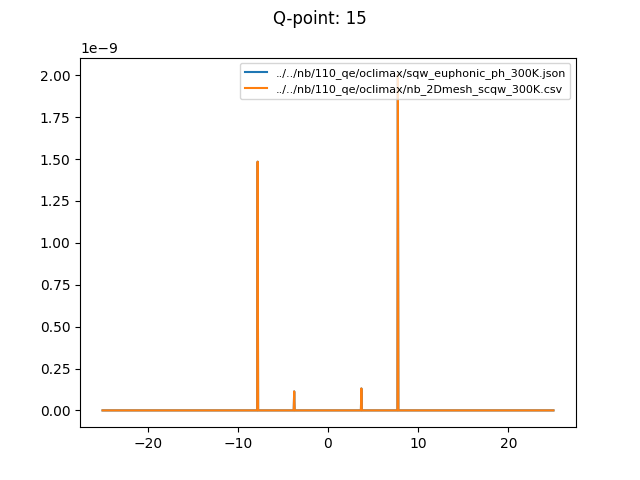

<IPython.core.display.Javascript object>


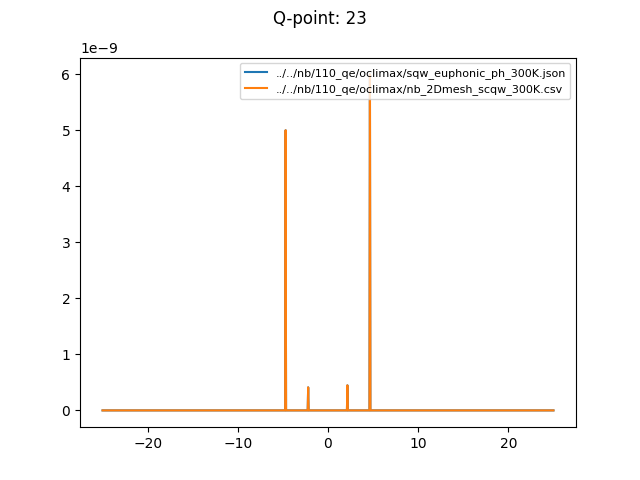

In [39]:
%matplotlib notebook
temp = '300'
compare_sqw_main(['--sqw1', '../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                  '--sqw2', '../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_' + temp + 'K.csv', '--qpts', '50,93', '--mask-bragg'])
compare_sqw_main(['--sqw1', '../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                  '--sqw2', '../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_' + temp + 'K.csv', '--qpts', '35,111', '--mask-bragg'])

compare_sqw_main(['--sqw1', '../../nb/m110_qe/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                  '--sqw2', '../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_' + temp + 'K.csv', '--qpts', '7,33', '--mask-bragg'])
compare_sqw_main(['--sqw1', '../../nb/110_qe/oclimax/sqw_euphonic_ph_' + temp + 'K.json',
                  '--sqw2', '../../nb/110_qe/oclimax/nb_2Dmesh_scqw_' + temp + 'K.csv', '--qpts', '15,23', '--mask-bragg'])

#### Comparing with eigenvalues/vectors interpolated from .castep_bin

The `sqw_euphonic_ph_5K.json` files contain Euphonic S(Q,w) calculated with frequencies read from a `.phonon` file, but to test Euphonic's interpolation we'll now read from `sqw_euphonic_5K.json` files which have been calculated with frequencies interpolated from a force constants matrix from a .castep_bin.

In [40]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

temp = '300'
quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_' + temp + 'K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_' + temp + 'K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])

nb_cuts = ['m110_qe', '110_qe']
for cut in nb_cuts:
    compare_sqw_main(['--sqw1', '../../nb/' + cut + '/oclimax/sqw_euphonic_' + temp + 'K.json',
                      '--sqw2', '../../nb/' + cut + '/oclimax/nb_2Dmesh_scqw_' + temp + 'K.csv',
                      '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_300K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 6.888242355797396e-12 max: 2.884980512101134e-09 min: 1.693450695609073e-19
Relative Error - mean: 0.017624627537145495 max: 2.182172264950563 min: 9.097804594670138e-07

Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_300K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.4102297236182379e-11 max: 3.901911266537921e-09 min: 7.385988894786932e-20
Relative Error - mean: 0.02816107515707907 max: 8.09456731668624 min: 4.707188012176381e-06

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 2.9279157173661625e-11 max: 1.3197547272192987e-09 min: 1.979253854546573e-17
Relative Error - mean: 0.0509392138902168 max: 2.430458538517135 min: 1.1621423756013333e-05

Results for ../../lzo/hh2_qe_fine/ocli

The results are similar to what has been shown for frequencies read from a .phonon file, only with slightly higher errors. As a sanity check, lets check some of the highest error q-points for each cut.


Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_300K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.2693248040088944e-11 max: 2.3681405786423424e-09 min: 8.952943748349095e-19
Relative Error - mean: 0.02497295191838175 max: 3.188796680536908 min: 2.0920948432414263e-06


<IPython.core.display.Javascript object>


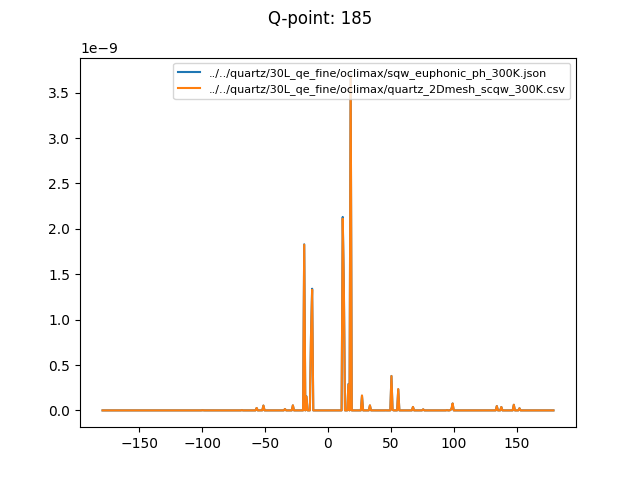

<IPython.core.display.Javascript object>


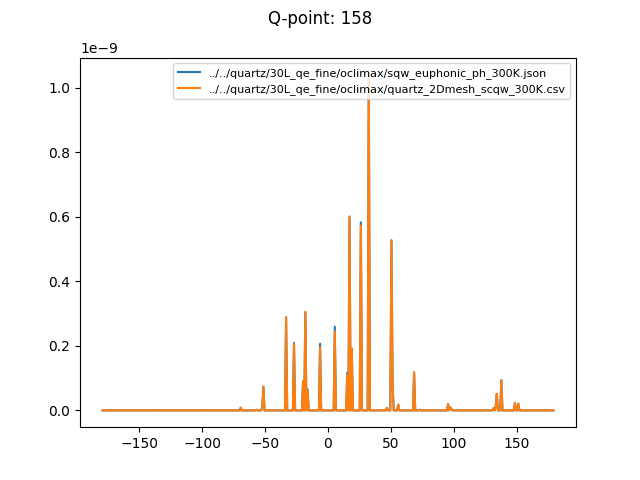

Points with largest mean relative error: (array([185, 185, 158, 158, 152]), array([205, 192, 214, 183, 192]))

Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_300K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_300K.csv
Absolute Error - mean: 4.191268309358541e-12 max: 2.1714536594819084e-09 min: 9.019511260075515e-20
Relative Error - mean: 0.011207321495302843 max: 0.5061874634464457 min: 5.813984152018183e-07


<IPython.core.display.Javascript object>


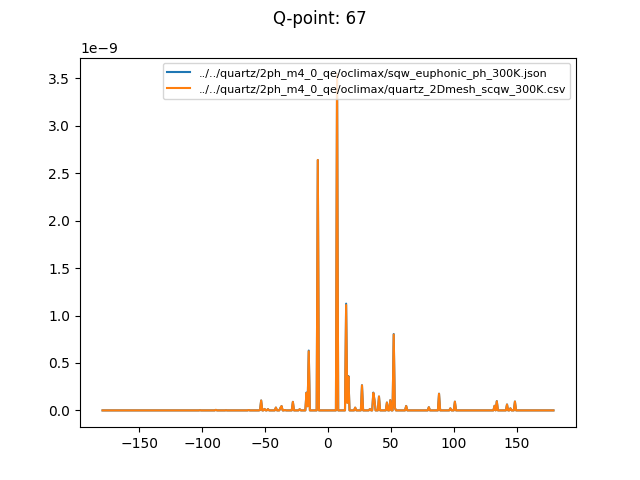

<IPython.core.display.Javascript object>


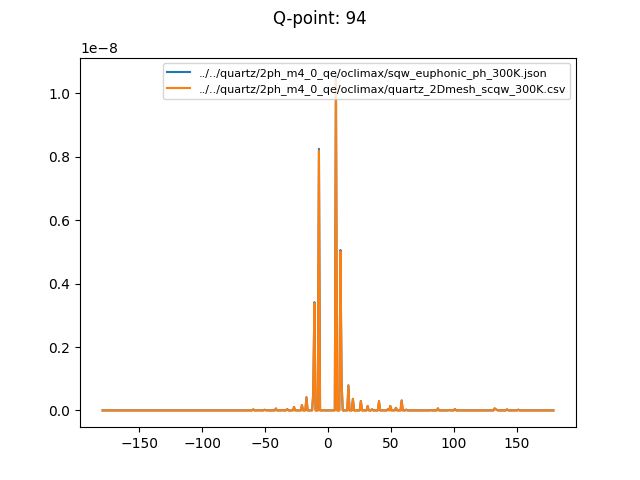

Points with largest mean relative error: (array([67, 67, 94, 94, 93]), array([134, 263, 242, 155, 157]))


In [42]:
compare_sqw_main(['--sqw1', '../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_300K.csv', '--qpts', '185,158', '--mask-bragg', '-n', '5'])
compare_sqw_main(['--sqw1', '../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_300K.csv', '--qpts', '67,94', '--mask-bragg', '-n', '5'])


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 2.9279157173661625e-11 max: 1.3197547272192987e-09 min: 1.979253854546573e-17
Relative Error - mean: 0.0509392138902168 max: 2.430458538517135 min: 1.1621423756013333e-05


<IPython.core.display.Javascript object>


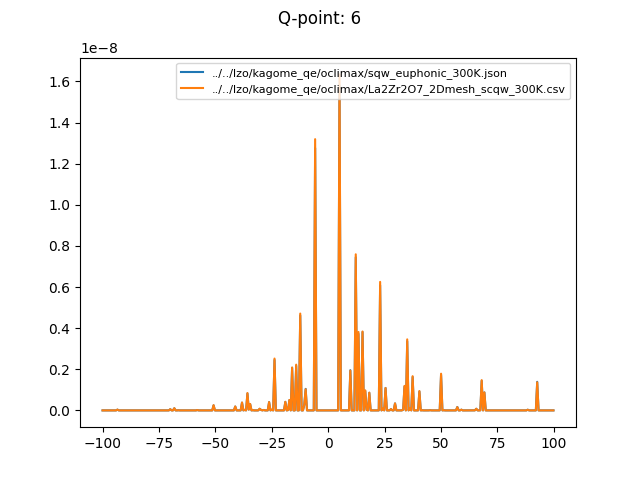

<IPython.core.display.Javascript object>


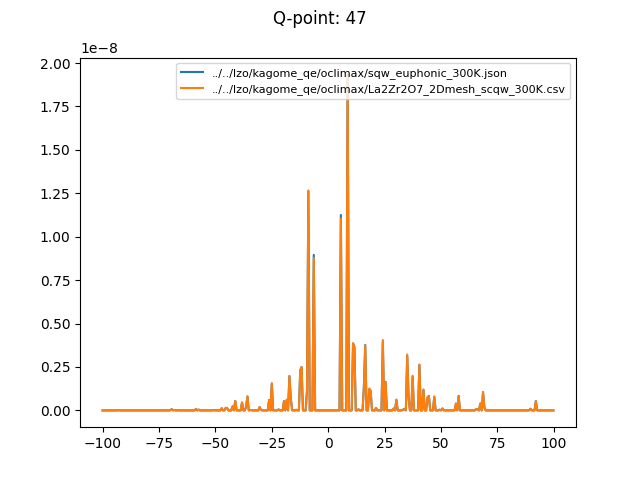


Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_300K.json ../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.4164490136412314e-11 max: 1.3963717103338004e-08 min: 3.251425019780237e-18
Relative Error - mean: 0.06255929193048207 max: 11.856177226171843 min: 6.609413299218023e-06


<IPython.core.display.Javascript object>


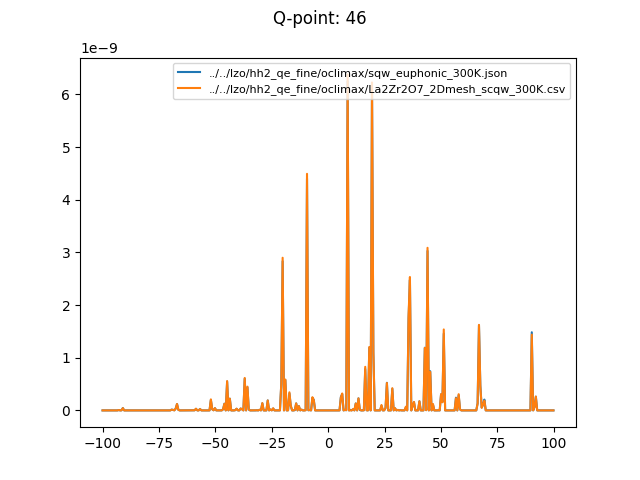

<IPython.core.display.Javascript object>


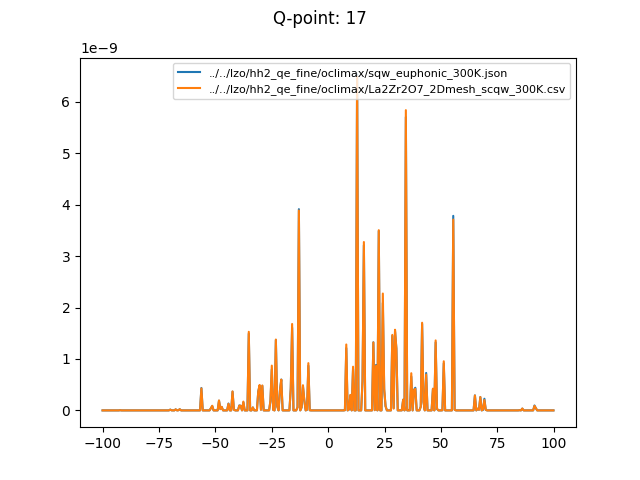

In [43]:
compare_sqw_main(['--sqw1', '../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json',
                  '--sqw2', '../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                  '--mask-bragg', '--qpts', '6,47'])
compare_sqw_main(['--sqw1', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_300K.json',
                   '--sqw2', '../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                   '--mask-bragg','--qpts', '46,17'])


Results for ../../nb/m110_qe/oclimax/sqw_euphonic_ph_300K.json ../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.7725480894978995e-14 max: 2.9344774608014096e-13 min: 8.90169139885105e-20
Relative Error - mean: 2.413343304206371e-06 max: 7.3949683359900125e-06 min: 2.120422786671137e-08


<IPython.core.display.Javascript object>


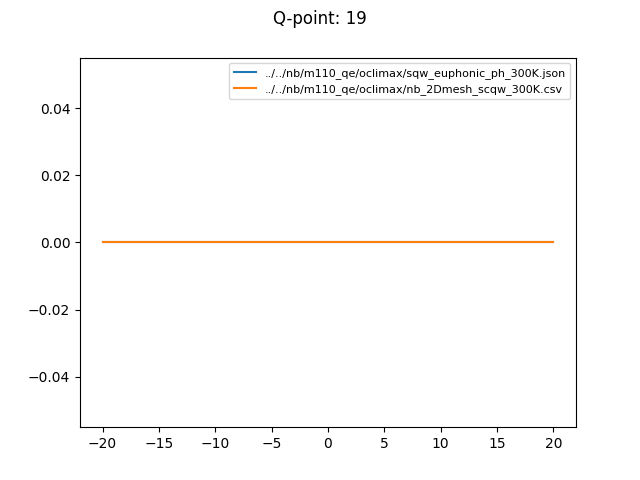

<IPython.core.display.Javascript object>


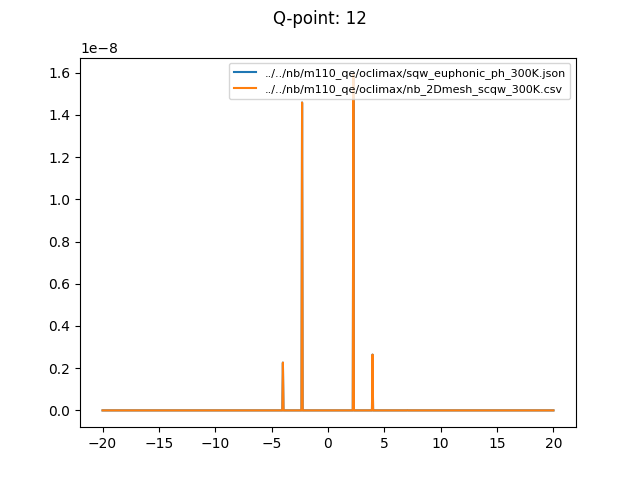


Results for ../../nb/110_qe/oclimax/sqw_euphonic_ph_300K.json ../../nb/110_qe/oclimax/nb_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.2721527633788793e-14 max: 3.4108871623855766e-13 min: 4.772927748916521e-18
Relative Error - mean: 2.0407180695351212e-05 max: 0.0002559325993560276 min: 9.058716655673881e-07


<IPython.core.display.Javascript object>


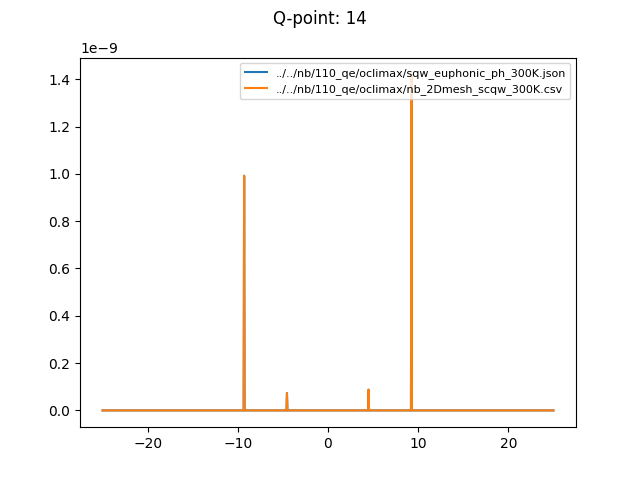

<IPython.core.display.Javascript object>


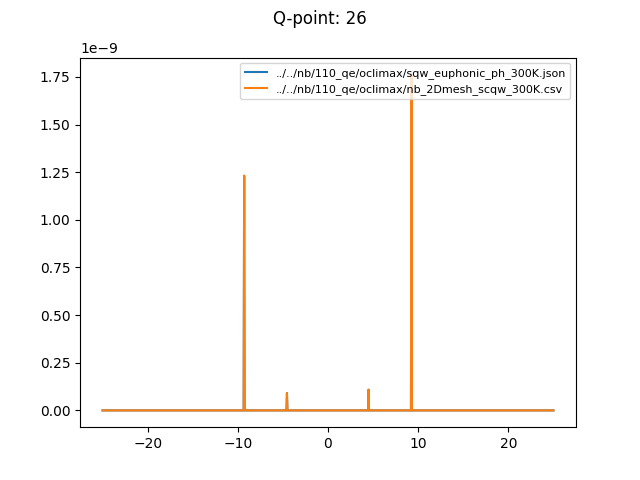

In [44]:
compare_sqw_main(['--sqw1', '../../nb/m110_qe/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_300K.csv', '--qpts', '19,12', '--mask-bragg'])
compare_sqw_main(['--sqw1', '../../nb/110_qe/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../nb/110_qe/oclimax/nb_2Dmesh_scqw_300K.csv', '--qpts', '14,26', '--mask-bragg'])

### Summary



The corrections made to the cuts and OClimax have resulted in very good agreement with Euphonic, particularly for Nb and Quartz, with average errors of a few % or less. With LZO the errors have been higher, 4-5% at 300K and 2-3% at 5K. This is largely due to low energy modes and can likely be attributed to floating point differences in the population factor and would not realistically make any difference to the calculation.